# **I/ Feature engineering v√† preprocessing**

In [ ]:
pip install category_encoders

In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, RegressorMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score,cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from category_encoders import MEstimateEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/KhiemDangLe/Final-Project/main/DataFolder/5_preprocessed_data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595 entries, 0 to 5594
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   article_id          5595 non-null   int64  
 1   category            5595 non-null   object 
 2   phone               5594 non-null   float64
 3   district            5595 non-null   object 
 4   date_posted         5595 non-null   object 
 5   area                5580 non-null   float64
 6   bedroom             4954 non-null   float64
 7   wc                  4537 non-null   float64
 8   direction           566 non-null    object 
 9   balcony_direction   234 non-null    object 
 10  total_room_LLm      2863 non-null   float64
 11  count_conveniences  5595 non-null   int64  
 12  alleyway_property   4866 non-null   float64
 13  under_mortgage      979 non-null    float64
 14  furnished           1426 non-null   float64
 15  has_lowerlevel      1415 non-null   float64
 16  has_ro

Xo√° nh·ªØng c·ªôt c√≥ qu√° nhi·ªÅu gi√° tr·ªã null ƒëi, v√¨ model s·∫Ω h·ªçc ƒë∆∞·ª£c qu√° nhi·ªÅu nh·ªØng ƒë·∫∑c tr∆∞ng v√¨ v·∫≠y c√≥ th·ªÉ d·∫´n t·ªõi overfitting khi g·∫∑p d·ªØ li·ªáu m·ªõi

In [ ]:
data.drop(['direction','balcony_direction','total_room_LLm','under_mortgage','furnished','has_lowerlevel','has_rooftop','street_name','date_posted','price_per_m2','article_id'],axis=1,inplace=True)

In [ ]:
X_missing_value= data.copy()
X_missing_value.drop(columns=['category','district'],inplace=True)


In [ ]:
train_mse_encoding=[]
test_mse_encoding=[]

## **1. Missing values**

| Ph∆∞∆°ng ph√°p                 | M√¥ t·∫£                                                                 | ∆Øu ƒëi·ªÉm                                                                                                                                 | Nh∆∞·ª£c ƒëi·ªÉm                                                                                                    |
|-----------------------------|----------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------|
| **Lo·∫°i b·ªè h√†ng**            | Lo·∫°i b·ªè c√°c h√†ng ch·ª©a gi√° tr·ªã thi·∫øu                                  | ƒê∆°n gi·∫£n v√† d·ªÖ th·ª±c hi·ªán                                                                                                                | M·∫•t th√¥ng tin, c√≥ th·ªÉ d·∫´n ƒë·∫øn m·∫•t m√°t d·ªØ li·ªáu quan tr·ªçng v√† l√†m gi·∫£m k√≠ch th∆∞·ªõc t·∫≠p d·ªØ li·ªáu                   |
| **ƒêi·ªÅn gi√° tr·ªã trung b√¨nh** | Thay th·∫ø gi√° tr·ªã thi·∫øu b·∫±ng gi√° tr·ªã trung b√¨nh c·ªßa c·ªôt               | D·ªÖ th·ª±c hi·ªán, kh√¥ng l√†m m·∫•t nhi·ªÅu th√¥ng tin                                                                                             | Kh√¥ng ph√π h·ª£p n·∫øu d·ªØ li·ªáu c√≥ nhi·ªÅu ngo·∫°i l·ªá ho·∫∑c kh√¥ng theo ph√¢n ph·ªëi chu·∫©n, l√†m gi·∫£m ƒë·ªô bi·∫øn thi√™n c·ªßa d·ªØ li·ªáu|
| **ƒêi·ªÅn gi√° tr·ªã trung v·ªã**   | Thay th·∫ø gi√° tr·ªã thi·∫øu b·∫±ng gi√° tr·ªã trung v·ªã c·ªßa c·ªôt                 | √çt b·ªã ·∫£nh h∆∞·ªüng b·ªüi c√°c gi√° tr·ªã ngo·∫°i l·ªá                                                                                               | Kh√¥ng ph·∫£n √°nh ƒë√∫ng ph√¢n ph·ªëi d·ªØ li·ªáu n·∫øu d·ªØ li·ªáu kh√¥ng ƒë·ªìng nh·∫•t                                             |
|
| **D·ª± ƒëo√°n (Imputation)**    | S·ª≠ d·ª•ng c√°c m√¥ h√¨nh h·ªçc m√°y ƒë·ªÉ d·ª± ƒëo√°n gi√° tr·ªã thi·∫øu d·ª±a tr√™n c√°c bi·∫øn kh√°c | Cho k·∫øt qu·∫£ ch√≠nh x√°c cao n·∫øu m√¥ h√¨nh t·ªët, t·∫≠n d·ª•ng ƒë∆∞·ª£c th√¥ng tin t·ª´ c√°c bi·∫øn kh√°c ƒë·ªÉ d·ª± ƒëo√°n gi√° tr·ªã thi·∫øu                           | Ph·ª©c t·∫°p, y√™u c·∫ßu ki·∫øn th·ª©c v·ªÅ m√¥ h√¨nh h√≥a, c√≥ th·ªÉ t·∫°o ra bias n·∫øu m√¥ h√¨nh kh√¥ng ph√π h·ª£p ho·∫∑c d·ªØ li·ªáu training k√©m|
       |
| **ƒêi·ªÅn gi√° tr·ªã d·ª±a tr√™n quan h·ªá**| Ph∆∞∆°ng ph√°p n√†y s·ª≠ d·ª•ng m·ªëi quan h·ªá gi·ªØa c√°c c·ªôt trong b·ªô d·ªØ li·ªáu ƒë·ªÉ ∆∞·ªõc l∆∞·ª£ng v√† ƒëi·ªÅn c√°c gi√° tr·ªã thi·∫øu.                                                           | S·ª≠ d·ª•ng th√¥ng tin to√†n di·ªán: T·∫≠n d·ª•ng t·ªëi ƒëa th√¥ng tin c√≥ s·∫µn trong b·ªô d·ªØ li·ªáu.              |


### a) Lo·∫°i b·ªè h√†ng ( v·ªõi nh·ªØng h√†ng missing <5%)

In [ ]:
X_missing_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595 entries, 0 to 5594
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   phone               5594 non-null   float64
 1   area                5580 non-null   float64
 2   bedroom             4954 non-null   float64
 3   wc                  4537 non-null   float64
 4   count_conveniences  5595 non-null   int64  
 5   alleyway_property   4866 non-null   float64
 6   numbers_of_floors   5225 non-null   float64
 7   price               5595 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 349.8 KB


In [ ]:
X_missing_value.isnull().sum()/len(X_missing_value)

phone                 0.000179
area                  0.002681
bedroom               0.114567
wc                    0.189097
count_conveniences    0.000000
alleyway_property     0.130295
numbers_of_floors     0.066130
price                 0.000000
dtype: float64

In [ ]:
X_missing_value.dropna(subset=['phone', 'area'], inplace=True)

In [ ]:
y_missing_value = X_missing_value.pop('price')

### b) S·ª≠ d·ª•ng gi√° tr·ªã trung b√¨nh

In [ ]:
X_mean=X_missing_value.copy()

In [ ]:
imputer = SimpleImputer(missing_values = np.nan,strategy ='mean')
X_mean = imputer.fit_transform(X_mean)

In [ ]:
model = DecisionTreeRegressor(max_depth=8)

X_train, X_test, y_train, y_test = train_test_split(X_mean, y_missing_value, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
train_mse_encoding.append(mse_train)
test_mse_encoding.append(mse_test)
print("MSE for Training Data:", mse_train)
print("MSE for Test Data:", mse_test)

MSE for Training Data: 1.6842425662485818
MSE for Test Data: 2.1733971038070248


### c) S·ª≠ d·ª•ng gi√° tr·ªã trung v·ªã

In [ ]:
X_median=X_missing_value.copy()

In [ ]:
imputer = SimpleImputer(missing_values = np.nan,strategy ='median')
X_median = imputer.fit_transform(X_median)

In [ ]:
model = DecisionTreeRegressor(max_depth=8)

X_train, X_test, y_train, y_test = train_test_split(X_median, y_missing_value, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
train_mse_encoding.append(mse_train)
test_mse_encoding.append(mse_test)
print("MSE for Training Data:", mse_train)
print("MSE for Test Data:", mse_test)

MSE for Training Data: 1.714835862294045
MSE for Test Data: 2.1904170100710103


### d) S·ª≠ d·ª•ng m·ªëi li√™n h·ªá c·ªßa c·ªôt kh√°c

In [ ]:
X_relationship=X_missing_value.copy()

In [ ]:
X_relationship['area_per_bedroom'] = X_relationship['area'] / X_relationship['bedroom']
X_relationship['area_per_wc'] = X_relationship['area'] / X_relationship['wc']
X_relationship['area_per_floor'] = X_relationship['area'] / X_relationship['numbers_of_floors']
for i in X_relationship[X_relationship['bedroom'].isna()].index:
    X_relationship.loc[i,'bedroom']=X_relationship.loc[i,'area']/np.mean(X_relationship['area_per_bedroom'])
for i in X_relationship[X_relationship['wc'].isna()].index: # Iterate over indices in X_relationship
    X_relationship.loc[i,'wc']=X_relationship.loc[i,'area']/np.mean(X_relationship['area_per_wc'])
for i in X_relationship[X_relationship['numbers_of_floors'].isna()].index:
    X_relationship.loc[i,'numbers_of_floors']=X_relationship.loc[i,'area']/np.mean(X_relationship['area_per_floor'])

In [ ]:

X_relationship.drop(columns=['area_per_bedroom','area_per_wc','area_per_floor'],inplace=True)
X_relationship.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5579 entries, 0 to 5594
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   phone               5579 non-null   float64
 1   area                5579 non-null   float64
 2   bedroom             5579 non-null   float64
 3   wc                  5579 non-null   float64
 4   count_conveniences  5579 non-null   int64  
 5   alleyway_property   4851 non-null   float64
 6   numbers_of_floors   5579 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 477.7 KB


In [ ]:
model = DecisionTreeRegressor(max_depth=8)

X_train, X_test, y_train, y_test = train_test_split(X_relationship.drop(columns='alleyway_property'), y_missing_value, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
train_mse_encoding.append(mse_train)
test_mse_encoding.append(mse_test)
print("MSE for Training Data:", mse_train)
print("MSE for Test Data:", mse_test)

MSE for Training Data: 1.6665526365588057
MSE for Test Data: 2.3027654944266986


### e) S·ª≠ d·ª•ng KNN

In [ ]:
X_KNN=X_missing_value.copy()

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
X_KNN = imputer.fit_transform(X_KNN)

In [ ]:
model = DecisionTreeRegressor(max_depth=8)

X_train, X_test, y_train, y_test = train_test_split(X_KNN, y_missing_value, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
train_mse_encoding.append(mse_train)
test_mse_encoding.append(mse_test)
print("MSE for Training Data:", mse_train)
print("MSE for Test Data:", mse_test)

MSE for Training Data: 1.727215624483802
MSE for Test Data: 2.138660432144424


### f) So s√°nh ch·ªçn ra ph∆∞∆°ng ph√°p x·ª≠ l√Ω missing values t·ªëi ∆∞u

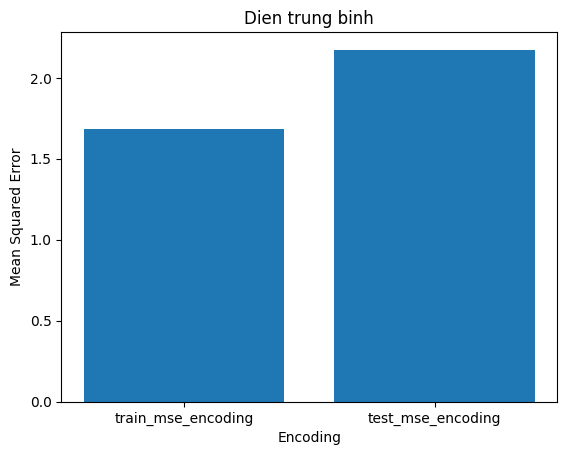

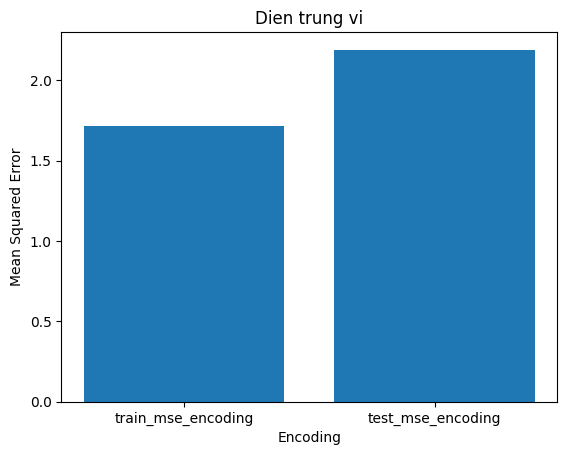

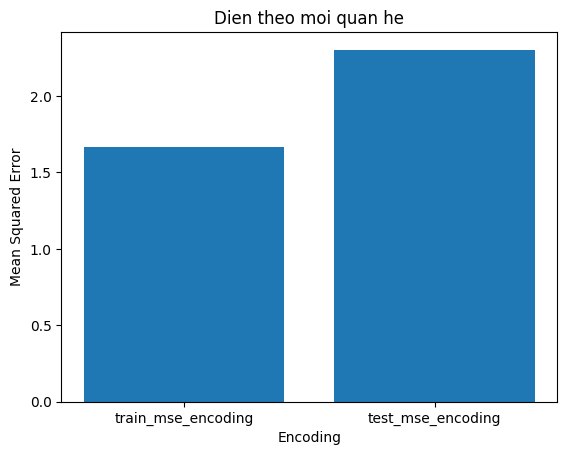

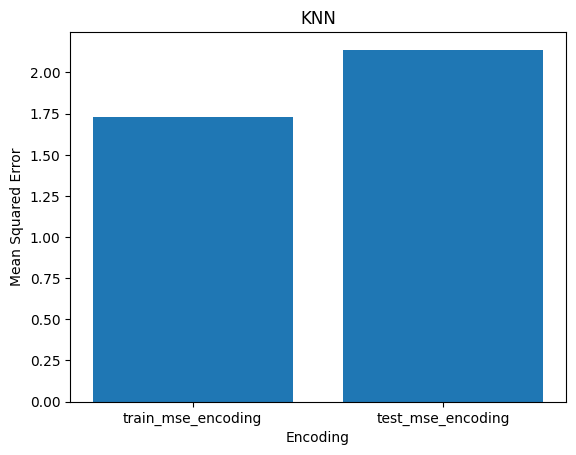

In [ ]:
encoding=['Dien trung binh','Dien trung vi','Dien theo moi quan he','KNN']
for index,i in enumerate(encoding):
  x = [train_mse_encoding[index], test_mse_encoding[index]]
  labels = ['train_mse_encoding', 'test_mse_encoding']
  fig, ax = plt.subplots()
  ax.bar(labels, x)
  ax.set_xlabel('Encoding')
  ax.set_ylabel('Mean Squared Error')
  ax.set_title(i)
  plt.show()


Ta th·∫•y ƒëi·ªÅn trung b√¨nh mang l·∫°i k·∫øt qu·∫£ t·ªët nh·∫•t

In [ ]:
X_encode=X_missing_value
y_encode=y_missing_value

## **2. Encoder**

**M·ªôt s·ªë ph∆∞∆°ng ph√°p Encoder** \

| Ph∆∞∆°ng ph√°p | M√¥ t·∫£ | ∆Øu ƒëi·ªÉm | Nh∆∞·ª£c ƒëi·ªÉm |
| --- | --- | --- | --- |
| **Numeric Encoding** | - G√°n m·ªôt s·ªë nguy√™n duy nh·∫•t cho m·ªói danh m·ª•c <br>c·ªßa m·ªôt ƒë·∫∑c tr∆∞ng danh m·ª•c. | - Tri·ªÉn khai ƒë∆°n gi·∫£n: D·ªÖ d√†ng g√°n s·ªë nguy√™n cho <br> c√°c danh m·ª•c.<br> <br> - S·ª≠ d·ª•ng √≠t b·ªô nh·ªõ h∆°n so v·ªõi m√£ h√≥a one-hot | - N·∫øu c√°c danh m·ª•c l√† danh m·ª•c ƒë·ªãnh danh (nominal,<br> kh√¥ng c√≥ th·ª© t·ª± t·ª± nhi√™n), c√¢y quy·∫øt ƒë·ªãnh c√≥<br> th·ªÉ hi·ªÉu sai c√°c gi√° tr·ªã s·ªë n√†y l√† c√≥<br> m·ªëi quan h·ªá th·ª© t·ª±, d·∫´n ƒë·∫øn c√°c ph√©p chia<br> kh√¥ng t·ªëi ∆∞u. |
| **One-Hot Encoding** | - M√£ h√≥a one-hot chuy·ªÉn ƒë·ªïi m·ªói danh m·ª•c th√†nh <br> m·ªôt ƒë·∫∑c tr∆∞ng nh·ªã ph√¢n ri√™ng bi·ªát. M·ªói danh m·ª•c <br> ban ƒë·∫ßu tr·ªü th√†nh m·ªôt ƒë·∫∑c tr∆∞ng m·ªõi, v√† gi√° tr·ªã <br> 1 ho·∫∑c 0 ch·ªâ ra s·ª± c√≥ m·∫∑t ho·∫∑c kh√¥ng c√≥  m·∫∑t <br> c·ªßa danh m·ª•c ƒë√≥ trong m·ªói m·∫´u. | - Kh√¥ng gi·∫£ ƒë·ªãnh th·ª© t·ª±: ƒê·∫£m b·∫£o m√¥ h√¨nh kh√¥ng <br> gi·∫£ ƒë·ªãnh b·∫•t k·ª≥ m·ªëi quan h·ªá th·ª© t·ª± n√†o gi·ªØa c√°c danh m·ª•c. <br> <br> - Ti√™u ch√≠ chia r√µ r√†ng: C√¢y quy·∫øt ƒë·ªãnh c√≥ th·ªÉ <br>chia tr√™n c√°c ƒë·∫∑c tr∆∞ng nh·ªã ph√¢n ri√™ng l·∫ª, l√†m <br> cho c√°c ph√©p chia d·ªÖ hi·ªÉu. <br><br> -T∆∞∆°ng th√≠ch r·ªông r√£i: Ho·∫°t ƒë·ªông t·ªët v·ªõi c√¢y quy·∫øt ƒë·ªãnh <br> v√¨ ch√∫ng c√≥ th·ªÉ x·ª≠ l√Ω kh√¥ng gian nhi·ªÅu chi·ªÅu<br> m·ªôt c√°ch hi·ªáu qu·∫£.  | - L√†m chi·ªÅu cao : C√≥ th·ªÉ t·∫°o ra nhi·ªÅu ƒë·∫∑c tr∆∞ng <br> m·ªõi, ƒë·∫∑c bi·ªát khi c√°c ƒë·∫∑c tr∆∞ng danh m·ª•c c√≥ <br> nhi·ªÅu gi√° tr·ªã kh√°c nhau, d·∫´n ƒë·∫øn tƒÉng chi ph√≠ <br> t√≠nh to√°n v√† s·ª≠ d·ª•ng b·ªô nh·ªõ. |
| **Binary Encoding** | - M√£ h√≥a nh·ªã ph√¢n ƒë·∫ßu ti√™n chuy·ªÉn c√°c danh m·ª•c <br> th√†nh c√°c gi√° tr·ªã s·ªë, sau ƒë√≥ bi·ªÉu di·ªÖn c√°c <br> gi√° tr·ªã n√†y d∆∞·ªõi d·∫°ng c√°c ch·ªØ s·ªë nh·ªã ph√¢n.<br> M·ªói ch·ªØ s·ªë ƒë∆∞·ª£c coi l√† m·ªôt ƒë·∫∑c tr∆∞ng ri√™ng bi·ªát. | - Gi·∫£m ƒë·ªô chi·ªÅu: Bi·ªÉu di·ªÖn g·ªçn h∆°n so v·ªõi m√£ <br> h√≥a one-hot, gi·∫£m s·ªë l∆∞·ª£ng ƒë·∫∑c tr∆∞ng.<br> <br> - X·ª≠ l√Ω t·ªët d·ªØ li·ªáu danh m·ª•c: Ph√π h·ª£p v·ªõi <br> d·ªØ li·ªáu danh m·ª•c m√† kh√¥ng ng·ª• √Ω b·∫•t k·ª≥ <br>th·ª© t·ª± n√†o.<br> <br> - Bi·ªÉu di·ªÖn hi·ªáu qu·∫£: C√≥ th·ªÉ ti·∫øt ki·ªám b·ªô nh·ªõ <br> v√† t√≠nh to√°n hi·ªáu qu·∫£ h∆°n so v·ªõi m√£ h√≥a one-hot. | -Tri·ªÉn khai ph·ª©c t·∫°p: Ph·ª©c t·∫°p h∆°n ƒë·ªÉ tri·ªÉn khai <br> so v·ªõi m√£ h√≥a one-hot.<br><br> - Kh√≥ hi·ªÉu h∆°n: C√°c ƒë·∫∑c tr∆∞ng nh·ªã ph√¢n k·∫øt qu·∫£ <br> c√≥ th·ªÉ kh√≥ hi·ªÉu h∆°n. |
|**Target Encoding**|- Ph∆∞∆°ng ph√°p m√£ h√≥a c√°c bi·∫øn ph√¢n lo·∫°i b·∫±ng c√°ch <br>thay th·∫ø m·ªói gi√° tr·ªã ph√¢n lo·∫°i b·∫±ng m·ªôt gi√° tr·ªã <br>th·ªëng k√™ li√™n quan ƒë·∫øn bi·∫øn m·ª•c ti√™u ch·∫≥ng h·∫°n<br> nh∆∞ trung b√¨nh c·ªßa bi·∫øn m·ª•c ti√™u cho t·ª´ng gi√° tr·ªã<br> ph√¢n lo·∫°i ƒë√≥.|- T·∫≠n d·ª•ng th√¥ng tin t·ª´ bi·∫øn m·ª•c ti√™u ƒë·ªÉ c·∫£i<br> thi·ªán hi·ªáu su·∫•t m√¥ h√¨nh.<br><br>-Gi·∫£m k√≠ch th∆∞·ªõc d·ªØ li·ªáu so v·ªõi one-hot encoding. | -Nguy c∆° overfitting cao.<br><br>- Ph·ª©c t·∫°p h∆°n trong t√≠nh to√°n v√† y√™u c·∫ßu bi·ªán<br> ph√°p ch·ªëng overfitting.
|**Frequency Encoding**| - M√£ h√≥a c√°c bi·∫øn ph√¢n lo·∫°i b·∫±ng c√°ch thay th·∫ø <br>m·ªói gi√° tr·ªã ph√¢n lo·∫°i b·∫±ng t·∫ßn su·∫•t xu·∫•t hi·ªán<br> c·ªßa gi√° tr·ªã ƒë√≥ trong d·ªØ li·ªáu.|- ƒê∆°n gi·∫£n v√† nhanh ch√≥ng.<br><br>-Kh√¥ng ph·ª• thu·ªôc v√†o bi·∫øn m·ª•c ti√™u, do ƒë√≥ √≠t <br>nguy c∆° overfitting.|-Th√¥ng tin h·∫°n ch·∫ø, ch·ªâ d·ª±a tr√™n t·∫ßn su·∫•t xu·∫•t hi·ªán.<br><br>- Kh√¥ng ph√¢n bi·ªát r√µ r√†ng gi·ªØa c√°c m·ª©c ƒë·ªô c√≥ <br>t·∫ßn su·∫•t t∆∞∆°ng t·ª±.


### a) Target encoding

In [ ]:
X_encoding = X_encode.sample(frac=0.2)
y_encoding = y_encode[X_encoding.index]
X_pretrain = X_encode.drop(X_encoding.index)
y_target_encoding = y_encode[X_pretrain.index]

In [ ]:
encoder = MEstimateEncoder(cols=["category","district"], m=5.0)


encoder.fit(X_encoding, y_encoding)


X_target_encoding = encoder.transform(X_pretrain)

In [ ]:
model = DecisionTreeRegressor(max_depth=8)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_target_encoding, y_target_encoding, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
train_mse_encoding.append(mse_train)
test_mse_encoding.append(mse_test)
print("MSE for Training Data:", mse_train)
print("MSE for Test Data:", mse_test)

MSE for Training Data: 1.3699420976611045
MSE for Test Data: 1.9285171370138678


### b) One-Hot Encoding

In [ ]:
X_one_hot= pd.get_dummies(X_encode, columns=['category', 'district'])

X_one_hot = X_one_hot.astype({col: 'int64' for col in X_one_hot.columns if col.startswith(('category_', 'district_'))})


In [ ]:
model = DecisionTreeRegressor(max_depth=7)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y_encode, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
train_mse_encoding.append(mse_train)
test_mse_encoding.append(mse_test)
print("MSE for Training Data:", mse_train)
print("MSE for Test Data:", mse_test)

MSE for Training Data: 1.8621807077653734
MSE for Test Data: 2.300271892014688


### c) Label encoding

In [ ]:
le = LabelEncoder()
X_label_encoding=X_encode.copy()
X_label_encoding['district'] = le.fit_transform(X_label_encoding['district'])

# Encode 'category' column and assign back to X
X_label_encoding['category'] = le.fit_transform(X_label_encoding['category'])

In [ ]:
model = DecisionTreeRegressor(max_depth=10)

X_train, X_test, y_train, y_test = train_test_split(X_label_encoding, y_encode, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
train_mse_encoding.append(mse_train)
test_mse_encoding.append(mse_test)
print("MSE for Training Data:", mse_train)
print("MSE for Test Data:", mse_test)

MSE for Training Data: 1.2467485843820283
MSE for Test Data: 2.680835948653475


### d) Binary encoding

In [ ]:
import pandas as pd
from category_encoders import BinaryEncoder

# Sample DataFrame

# Define the binary encoder
encoder = BinaryEncoder(cols=['category', 'district'])

# Fit and transform the DataFrame
X_binary_encoding = encoder.fit_transform(X_encode)

In [ ]:
model = DecisionTreeRegressor(max_depth=8)

X_train, X_test, y_train, y_test = train_test_split(X_binary_encoding, y_encode, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
train_mse_encoding.append(mse_train)
test_mse_encoding.append(mse_test)
print("MSE for Training Data:", mse_train)
print("MSE for Test Data:", mse_test)

MSE for Training Data: 1.5539279517652196
MSE for Test Data: 2.427685774071604


### e)Frequency encoding

In [ ]:
X_frequency_encoding = X_encode.copy()

In [ ]:
category_frequency = X_frequency_encoding['category'].value_counts().to_dict()
district_frequency = X_frequency_encoding['district'].value_counts().to_dict()

X_frequency_encoding['category'] = X_frequency_encoding['category'].map(category_frequency)
X_frequency_encoding['district'] = X_frequency_encoding['district'].map(district_frequency)


In [ ]:
model = DecisionTreeRegressor(max_depth=8)

X_train, X_test, y_train, y_test = train_test_split(X_frequency_encoding, y_encode, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
train_mse_encoding.append(mse_train)
test_mse_encoding.append(mse_test)
print("MSE for Training Data:", mse_train)
print("MSE for Test Data:", mse_test)

MSE for Training Data: 1.5239571091152333
MSE for Test Data: 2.5275221886758947


### f)So s√°nh ch·ªçn ra ph∆∞∆°ng ph√°p x·ª≠ l√Ω encoding t·ªëi ∆∞u

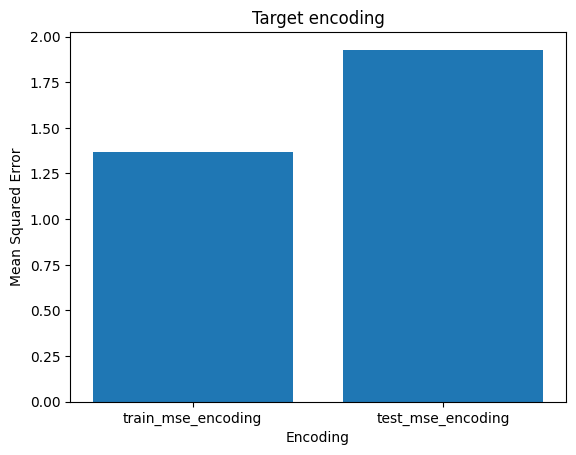

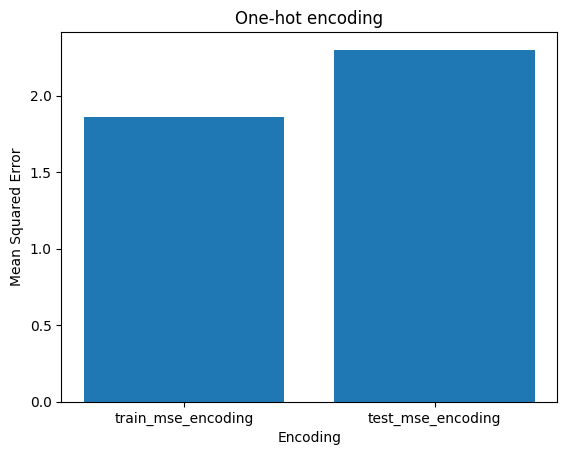

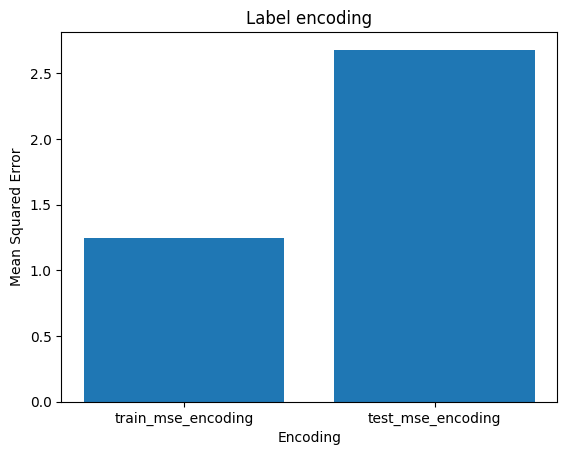

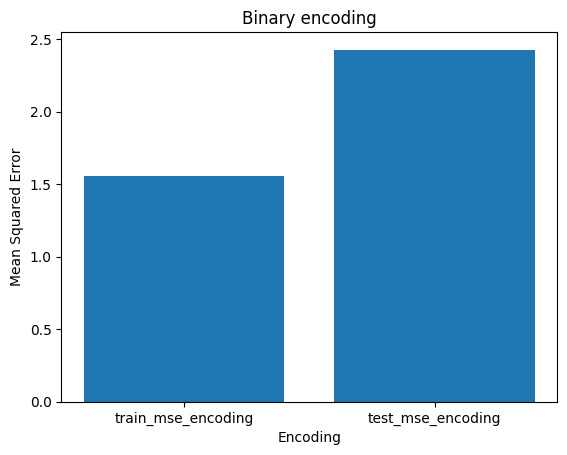

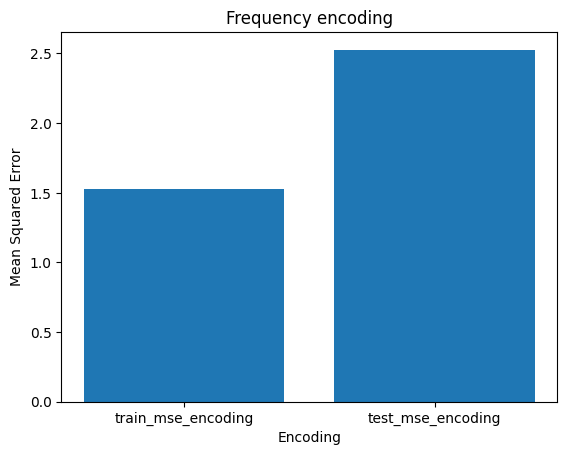

In [ ]:
encoding=['Target encoding', 'One-hot encoding', 'Label encoding', 'Binary encoding', 'Frequency encoding']
for index,i in enumerate(encoding):
  x = [train_mse_encoding[index], test_mse_encoding[index]]
  labels = ['train_mse_encoding', 'test_mse_encoding']
  fig, ax = plt.subplots()
  ax.bar(labels, x)
  ax.set_xlabel('Encoding')
  ax.set_ylabel('Mean Squared Error')
  ax.set_title(i)
  plt.show()


ta ch·ªçn target encoding c√≥ MSE t·∫≠p train v√† test l√† nh·ªè nh·∫•t

In [ ]:
X=X_target_encoding
y=y_target_encoding

# **II/Regression tree**




## **1. T·ªïng quan v·ªÅ regression tree**

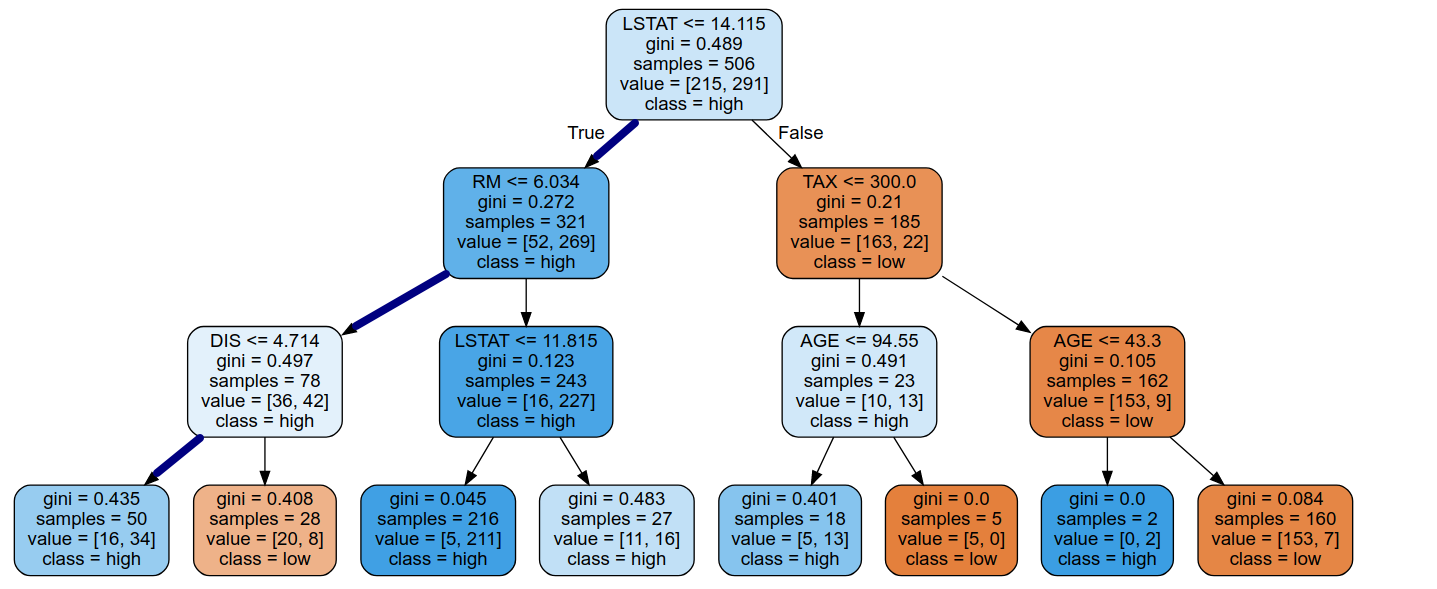

- M√¥ h√¨nh c√¢y quy·∫øt ƒë·ªãnh l√† m·ªôt m√¥ h√¨nh ƒë∆∞·ª£c s·ª≠ d·ª•ng kh√° ph·ªï bi·∫øn v√† hi·ªáu qu·∫£ trong c·∫£ hai l·ªõp b√†i to√°n ph√¢n lo·∫°i v√† d·ª± b√°o c·ªßa h·ªçc c√≥ gi√°m s√°t. Kh√°c v·ªõi nh·ªØng thu·∫≠t to√°n kh√°c trong h·ªçc c√≥ gi√°m s√°t, m√¥ h√¨nh c√¢y quy·∫øt ƒë·ªãnh kh√¥ng t·ªìn t·∫°i ph∆∞∆°ng tr√¨nh d·ª± b√°o. M·ªçi vi·ªác ch√∫ng ta c·∫ßn th·ª±c hi·ªán ƒë√≥ l√† t√¨m ra m·ªôt c√¢y quy·∫øt ƒë·ªãnh d·ª± b√°o t·ªët tr√™n t·∫≠p hu·∫•n luy·ªán v√† s·ª≠ d·ª•ng c√¢y quy·∫øt ƒë·ªãnh n√†y d·ª± b√°o tr√™n t·∫≠p ki·ªÉm tra.

## **2. C√°ch ho·∫°t ƒë·ªông c·ªßa Regression Tree**

### Thu·∫≠t to√°n

a) Kh·ªüi t·∫°o:

B·∫Øt ƒë·∫ßu v·ªõi to√†n b·ªô t·∫≠p d·ªØ li·ªáu v√† t·∫°o m·ªôt node g·ªëc (root node).

b)  Ch·ªçn ƒëi·ªÅu ki·ªán ph√¢n chia:


- T·∫°i m·ªói node, ch·ªçn m·ªôt ƒë·∫∑c tr∆∞ng (feature)
ùëãùëó
‚Äã
  v√† m·ªôt gi√° tr·ªã ng∆∞·ª°ng (threshold) t ƒë·ªÉ chia d·ªØ li·ªáu th√†nh hai t·∫≠p con: m·ªôt t·∫≠p con v·ªõi
ùëã
ùëó‚â§ùë°

‚Äã
 v√† m·ªôt t·∫≠p con v·ªõi
ùëãùëó>ùë°
.
- ƒêi·ªÅu ki·ªán ph√¢n chia ƒë∆∞·ª£c ch·ªçn sao cho n√≥ t·ªëi ∆∞u nh·∫•t theo m·ªôt ti√™u ch√≠ nh·∫•t ƒë·ªãnh, th√¥ng th∆∞·ªùng l√† gi·∫£m thi·ªÉu t·ªïng sai s·ªë b√¨nh ph∆∞∆°ng (sum of squared errors - SSE) ho·∫∑c m·ªôt ti√™u ch√≠ t∆∞∆°ng t·ª±.



H√†m SSE:

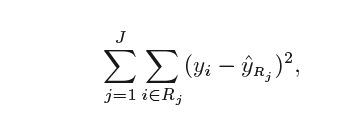

c) T√≠nh to√°n ti√™u ch√≠ ph√¢n chia:

- Ph√¢n chia th√†nh 2 node

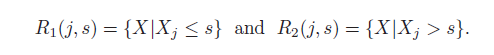

- SSE c·ªßa 2 node sau khi ph√¢n chia

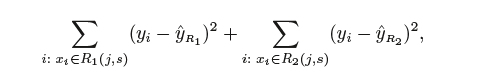

- Ti√™u ch√≠ ph√¢n chia  l√† s·ª± gi·∫£m thi·ªÉu SSE

d) L·∫∑p l·∫°i qu√° tr√¨nh ph√¢n chia:

L·∫∑p l·∫°i qu√° tr√¨nh ch·ªçn ƒëi·ªÅu ki·ªán ph√¢n chia v√† t√≠nh to√°n SSE cho ƒë·∫øn khi ƒë·∫°t ƒë∆∞·ª£c m·ªôt trong c√°c ƒëi·ªÅu ki·ªán d·ª´ng:
  - S·ªë l∆∞·ª£ng m·∫´u trong node nh·ªè h∆°n m·ªôt ng∆∞·ª°ng t·ªëi thi·ªÉu.
  - Kh√¥ng c√≥ s·ª± gi·∫£m ƒë√°ng k·ªÉ trong SSE.
  - ƒê·ªô s√¢u c·ªßa c√¢y ƒë·∫°t ƒë·∫øn m·ªôt m·ª©c t·ªëi ƒëa ƒë√£ ƒë·ªãnh tr∆∞·ªõc.

## **3. Coding**

### Implement

In [ ]:
def SSE(y):
    if len(y) == 0:
        return 0
    mean_y = np.mean(y)
    return np.sum((y - mean_y) ** 2)

In [ ]:
class Node:
    def __init__(self, feature=None, threshold=None, reduction=None, right=None, left=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.reduction = reduction
        self.right = right
        self.left = left
        self.value = value

In [ ]:
class RegressionTree(BaseEstimator, RegressorMixin):
    def __init__(self, min_samples_split=2, max_depth=10, max_features=None, random_state=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth if max_depth is not None else float('inf')
        self.feature_importances_ = None
        self.max_features = max_features
        self.random_state = random_state
        self.root = None

    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        if isinstance(y, pd.Series):
            y = y.to_numpy()
        self.feature_importances_ = np.zeros(X.shape[1])
        self.root = self.build_tree(X, y)
        self.compute_feature_importances(self.root)

    def find_best_split(self, X, y):
        best_split = None
        best_reduction = -float('inf')
        n_samples, n_features = X.shape

        if self.max_features is None:
            max_features = n_features
        elif isinstance(self.max_features, str):
            if self.max_features == 'sqrt':
                max_features = int(np.sqrt(n_features))
            elif self.max_features == 'log2':
                max_features = int(np.log2(n_features))
            else:
                raise ValueError(f"Invalid value for max_features: {self.max_features}")
        elif isinstance(self.max_features, float):
            max_features = max(1, int(self.max_features * n_features))
        else:
            max_features = self.max_features

        if self.random_state is not None:
            np.random.seed(self.random_state)

        idxs = np.random.choice(n_features, max_features, replace=False)
        for feature in idxs:
            for threshold in np.unique(X[:, feature]):
                left_indices = (X[:, feature] <= threshold)
                right_indices = (X[:, feature] > threshold)

                if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
                    continue

                left_y = y[left_indices]
                right_y = y[right_indices]
                sse_left = SSE(left_y)
                sse_right = SSE(right_y)
                reduction = SSE(y) - (sse_left + sse_right)

                if reduction > best_reduction:
                    best_split = {
                        'left': left_indices,
                        'right': right_indices,
                        'feature': feature,
                        'threshold': threshold,
                        'reduction': reduction
                    }
                    best_reduction = reduction
        return best_split

    def build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        if n_samples >= self.min_samples_split and depth <= self.max_depth:
            best_split = self.find_best_split(X, y)
            if best_split is not None:
                right = self.build_tree(X[best_split['right']], y[best_split['right']], depth + 1)
                left = self.build_tree(X[best_split['left']], y[best_split['left']], depth + 1)
                return Node(best_split['feature'], best_split['threshold'], best_split['reduction'], right, left)
        return Node(value=np.mean(y) if len(y) > 0 else None)

    def predict(self, X):
        X = np.atleast_2d(X)
        return np.array([self._predict(x) for x in X])

    def _predict(self, X):
        node = self.root
        while node.left is not None or node.right is not None:
            if X[node.feature] <= node.threshold:
                node = node.left
            else:
                node = node.right
        return node.value

    def compute_feature_importances(self, node):
        if node is not None and node.feature is not None:
            if node.reduction is not None:
                self.feature_importances_[node.feature] += node.reduction
            self.compute_feature_importances(node.left)
            self.compute_feature_importances(node.right)

    def get_feature_importances(self):
        total_importance = np.sum(self.feature_importances_)
        if total_importance > 0:
            return self.feature_importances_ / total_importance
        return self.feature_importances_

    def get_params(self, deep=True):
        return {
            'min_samples_split': self.min_samples_split,
            'max_depth': self.max_depth,
            'max_features': self.max_features,
            'random_state': self.random_state
        }

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

### Th·ª≠ nghi·ªám v·ªõi d·ªØ li·ªáu

In [ ]:
dataset = np.array(
[[ 100, 1000],
[500, 3000],
[ 1500, 5000],
[ 3500, 8000],
[ 5000, 6500],
[6000, 7000],
[ 8000, 15000],
[ 9500, 20000],
[ 12000, 21000],
[14000, 25000],
[ 15500, 27000],
[ 16500, 30000],
[ 25000, 52000],
[ 30000, 80000]
])

In [ ]:
X_dataset = dataset[:, 1:2].astype(int)
y_dataset=dataset[:,-1].astype(int)
tree=RegressionTree()
tree.fit(X_dataset,y_dataset)
tree.predict(100)

array([1000.])

<ipython-input-32-9300a267979a>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_dataset), max(X_dataset), 0.01)


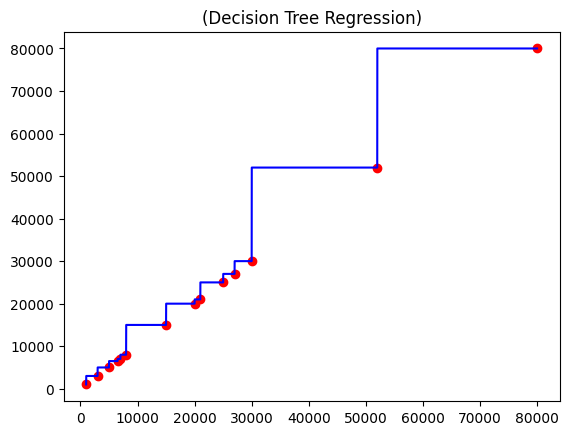

In [ ]:
tree=RegressionTree(min_samples_split=0)
tree.fit(X_dataset,y_dataset)
X_grid = np.arange(min(X_dataset), max(X_dataset), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
# v·∫Ω ƒë·ªì th·ªã
plt.scatter(X_dataset, y_dataset, color = 'red')
plt.plot(X_grid, tree.predict(X_grid), color = 'blue')
plt.title('(Decision Tree Regression)')
plt.show()

- Ta th·∫•y model ƒëang c√≥ d·∫•u hi·ªáu b·ªã overfitting

- V√¨ v·∫≠y ta √°p d·ª•ng c√°c ph∆∞∆°ng ph√°p Pruning. Vi·ªác Pruning nh·∫±m m·ª•c ƒë√≠ch ƒë∆°n gi·∫£n h√≥a decision tree b·∫±ng c√°ch lo·∫°i b·ªè nh·ªØng ph·∫ßn kh√¥ng mang l·∫°i kh·∫£ nƒÉng d·ª± ƒëo√°n ƒë√°ng k·ªÉ, do ƒë√≥ c·∫£i thi·ªán kh·∫£ nƒÉng kh√°i qu√°t h√≥a d·ªØ li·ªáu m·ªõi. Pruning decision tree lo·∫°i b·ªè c√°c n√∫t kh√¥ng mong mu·ªën kh·ªèi overfitting decision tree ƒë·ªÉ l√†m cho n√≥ c√≥ k√≠ch th∆∞·ªõc nh·ªè h∆°n, d·∫´n ƒë·∫øn d·ª± ƒëo√°n nhanh h∆°n, ch√≠nh x√°c h∆°n v√† hi·ªáu qu·∫£ h∆°n.

<ipython-input-33-570c1afbafd8>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_dataset), max(X_dataset), 0.01)


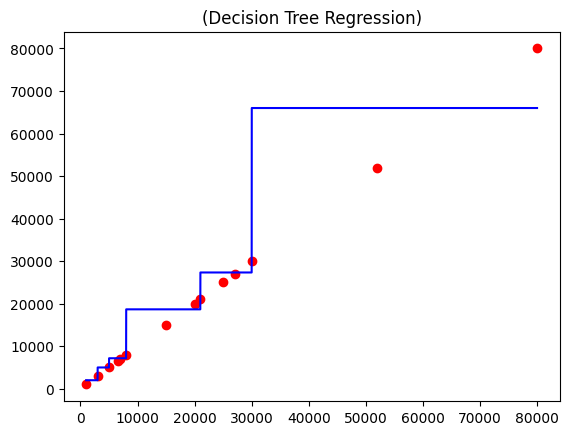

In [ ]:
tree=RegressionTree(min_samples_split=4,max_depth=12)
tree.fit(X_dataset,y_dataset)
X_grid = np.arange(min(X_dataset), max(X_dataset), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
# v·∫Ω ƒë·ªì th·ªã
plt.scatter(X_dataset, y_dataset, color = 'red')
plt.plot(X_grid, tree.predict(X_grid), color = 'blue')
plt.title('(Decision Tree Regression)')
plt.show()

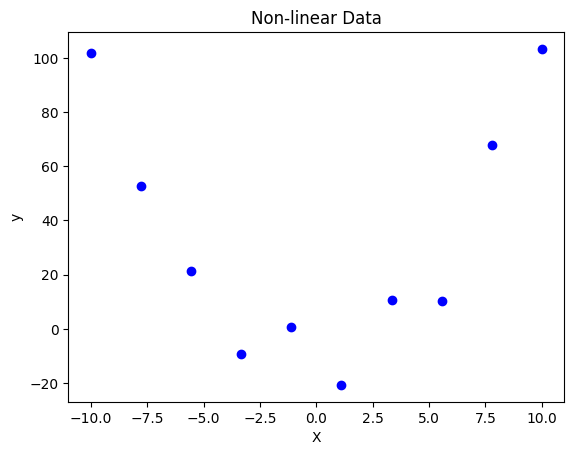

In [ ]:
# t·∫°o ra data non-linear
X_dataset = np.linspace(-10, 10, 10).reshape(-1, 1)
y_dataset = X_dataset**2 + np.random.randn(10, 1) * 10
plt.scatter(X_dataset, y_dataset, color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Non-linear Data')
plt.show()

In [ ]:
linear=LinearRegression()

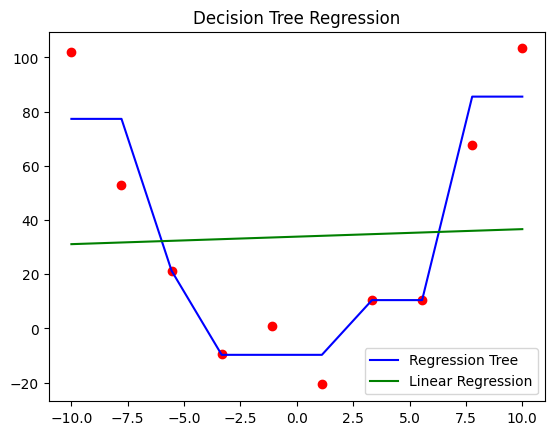

In [ ]:
tree.fit(X_dataset,y_dataset)
linear.fit(X_dataset,y_dataset)
plt.scatter(X_dataset, y_dataset, color = 'red')
plt.plot(X_dataset, tree.predict(X_dataset), color = 'blue',label='Regression Tree')
plt.plot(X_dataset, linear.predict(X_dataset), color = 'green',label='Linear Regression')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

- M√¥ h√¨nh Regression Tree hi·ªÉu qu·∫£ ƒë·ªëi v·ªõi b√†i to√°n non-linear

In [ ]:
# t·∫°o ra data v·ªõi missing values
dataset=np.array(
[[ 100, 1000],
[500, 3000],
[ np.NaN, 5000],
[ 3500, 8000],
[ 5000, 6500],
[6000, 7000],
[ 8000, 15000],
[ np.NaN, 20000],
[ 12000, 21000],
[np.NaN, 25000],
[ 15500, 27000],
[ 16500, 30000],
[ 25000, 52000],
[ 30000, 80000]
])

In [ ]:
X_dataset = dataset[:, 1:2].astype(int)
y_dataset=dataset[:,-1].astype(int)

In [ ]:
tree=RegressionTree()
tree.fit(X_dataset,y_dataset)
tree.predict(1000)

array([1000.])

- Regression tree c√≥ th·ªÉ thao t√°c v·ªõi data ch·ª©a missing values

### Thao t√°c  v·ªõi d·ªØ li·ªáu gi√° nh√†

In [ ]:
model = RegressionTree(min_samples_split=4,max_depth=7)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("MSE for Training Data:", mse_train)
print("MSE for Test Data:", mse_test)

MSE for Training Data: 0.7756853150347542
MSE for Test Data: 2.2108862392232638


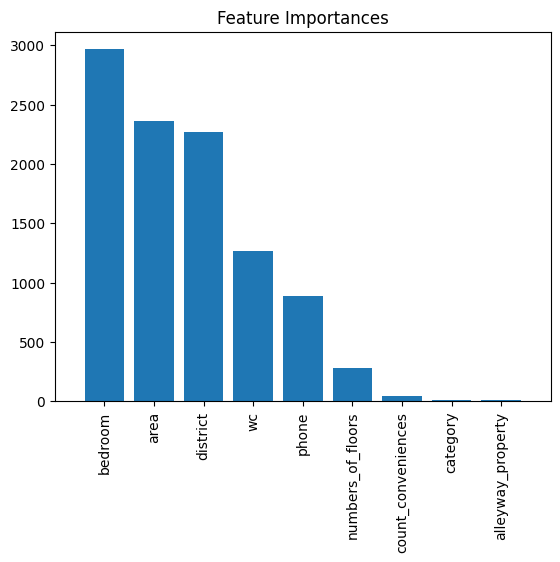

In [ ]:

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

- Feature bedroom c√≥ gi√° tr·ªã cao nh·∫•t n√™n l√† feature quan tr·ªçng nh·∫•t

Text(0.5, 1.0, 'Comparison of MSE for Training and Test Sets')

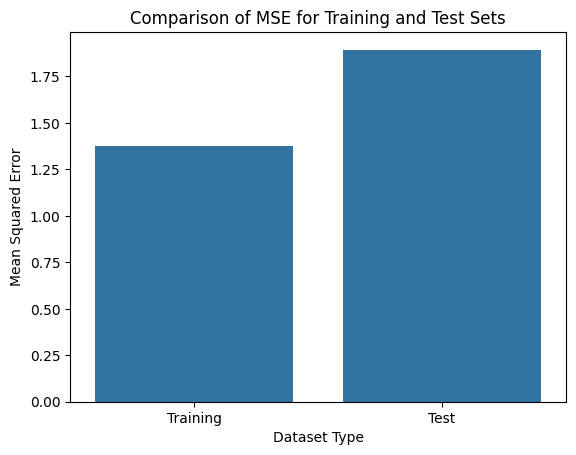

In [ ]:
sns.barplot(x='Type', y='MSE' ,data=pd.DataFrame({'Type':['Training','Test'],'MSE':[mse_train,mse_test]}))
plt.xlabel('Dataset Type')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of MSE for Training and Test Sets')

In [ ]:
treeSklearn=DecisionTreeRegressor()
treeSklearn.fit(X_train, y_train)
y_train_pred = treeSklearn.predict(X_train)
y_test_pred =treeSklearn.predict(X_test)
mse_trainSklearn = mean_squared_error(y_train, y_train_pred)
mse_testSklearn  = mean_squared_error(y_test, y_test_pred)

print("MSE for Training Data:", mse_train)
print("MSE for Test Data:", mse_test)

MSE for Training Data: 0.014946173607584224
MSE for Test Data: 2.9304984273887413


Text(0.5, 1.0, 'Comparison of MSE for Training and Test Sets')

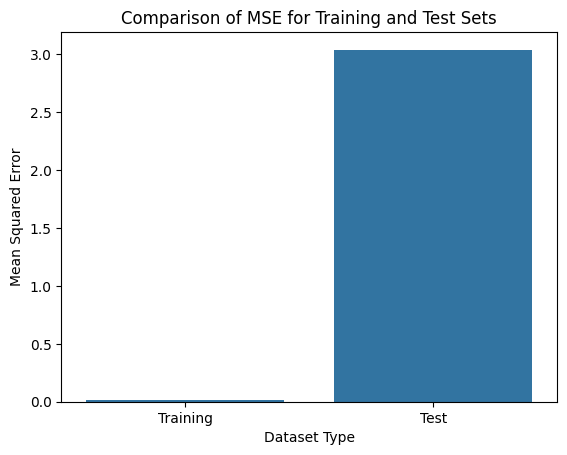

In [ ]:
sns.barplot(x='Type', y='MSE' ,data=pd.DataFrame({'Type':['Training','Test'],'MSE':[mse_trainSklearn,mse_testSklearn ]}))
plt.xlabel('Dataset Type')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of MSE for Training and Test Sets')

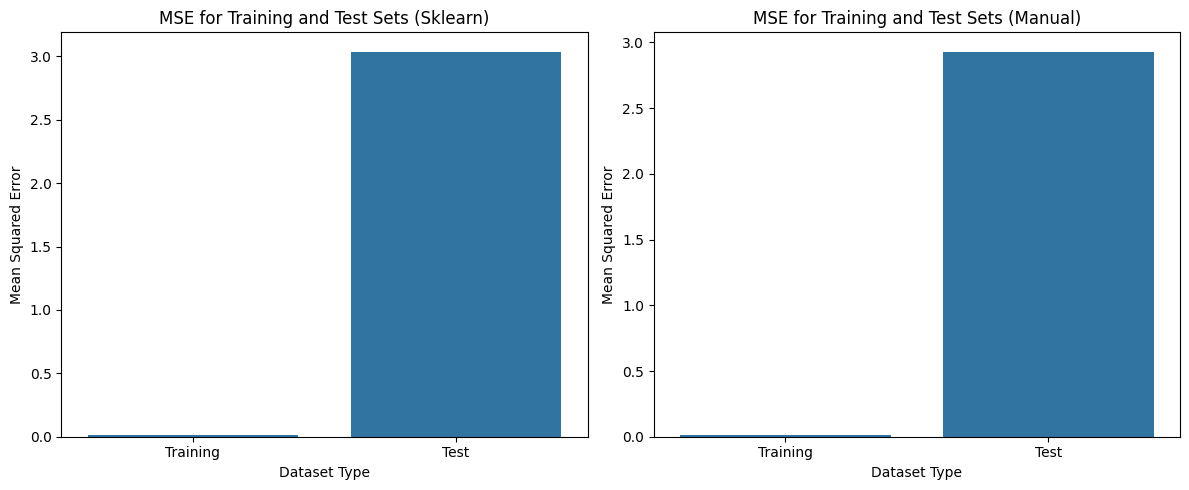

In [ ]:
data_sklearn = pd.DataFrame({
    'Type': ['Training', 'Test'],
    'MSE': [mse_trainSklearn, mse_testSklearn]
})

data_manual = pd.DataFrame({
    'Type': ['Training', 'Test'],
    'MSE': [mse_train, mse_test]
})


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


sns.barplot(x='Type', y='MSE', data=data_sklearn, ax=axes[0])
axes[0].set_xlabel('Dataset Type')
axes[0].set_ylabel('Mean Squared Error')
axes[0].set_title('MSE for Training and Test Sets (Sklearn)')


sns.barplot(x='Type', y='MSE', data=data_manual, ax=axes[1])
axes[1].set_xlabel('Dataset Type')
axes[1].set_ylabel('Mean Squared Error')
axes[1].set_title('MSE for Training and Test Sets (Manual)')


plt.tight_layout()
plt.show()

K·∫øt qu·∫£ MSE l√† nh∆∞ nhau ·ªü 2 t·ª± implement v√† Sklearn

## **4. Pipeline**


In [ ]:
model=RegressionTree()

In [ ]:
param_grid = {
     'min_samples_split': [2, 5, 10],
    'max_depth': [5, 10, 20, None],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.8]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

In [ ]:
grid.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-29-72685849f974>", line 16, in fit
    self.root = self.build_tree(X, y)
  File "<ipython-input-29-72685849f974>", line 69, in build_tree
    if n_samples >= self.min_samples_split and depth <= self.max_depth:
TypeError: '<=' not supported between instances of 'int' and 'NoneType'

  warning

GridSearchCV(cv=5, estimator=RegressionTree(),
             param_grid={'max_depth': [5, 10, 20, None],
                         'max_features': [None, 'sqrt', 'log2', 0.5, 0.8],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

C√°c tham s·ªë t·ªëi ∆∞u cho regression tree max_depth:5,max_features=0.8,min_samples_split: 10

In [ ]:
grid.best_params_

{'max_depth': 5, 'max_features': 0.8, 'min_samples_split': 10}

## **5.K·∫øt qu·∫£ cu·ªëi c√πng**

In [ ]:
model = RegressionTree(min_samples_split=10,max_depth=5,max_features=0.8)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("MSE for Training Data:", mse_train)
print("MSE for Test Data:", mse_test)

MSE for Training Data: 1.847092370118564
MSE for Test Data: 2.0168677431116064


# **III/ Random forest**

## **1. T·ªïng quan v·ªÅ random forest**

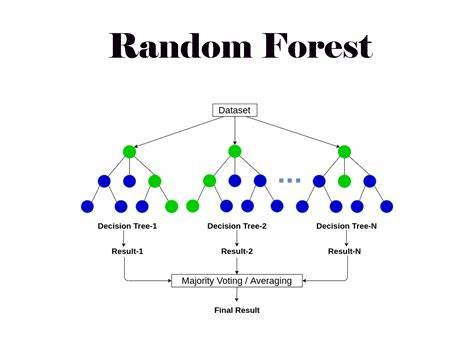

- Random forest l√† m·ªôt b√†i to√°n supervised. Random forest  l√† m·ªôt t·∫≠p h·ª£p c√°c decision tree, th∆∞·ªùng ƒë∆∞·ª£c hu·∫•n luy·ªán b·∫±ng ph∆∞∆°ng ph√°p bagging. √ù t∆∞·ªüng chung c·ªßa ph∆∞∆°ng ph√°p bagging l√† s·ª± k·∫øt h·ª£p c·ªßa c√°c m√¥ h√¨nh h·ªçc t·∫≠p s·∫Ω l√†m tƒÉng k·∫øt qu·∫£ t·ªïng th·ªÉ. N√≥i m·ªôt c√°ch ƒë∆°n gi·∫£n: random forest x√¢y d·ª±ng nhi·ªÅu decisio tree v√† h·ª£p nh·∫•t ch√∫ng l·∫°i v·ªõi nhau ƒë·ªÉ c√≥ ƒë∆∞·ª£c d·ª± ƒëo√°n ch√≠nh x√°c v√† ·ªïn ƒë·ªãnh h∆°n.

## **2. C√°ch ho·∫°t ƒë·ªông c·ªßa random forest**

### Thu·∫≠t to√°n

a) Kh·ªüi t·∫°o

- B·∫Øt ƒë·∫ßu v·ªõi to√†n b·ªô d·ªØ li·ªáu

b) L·∫•y m·∫´u Bootstrap

- T·∫°o nhi·ªÅu t·∫≠p d·ªØ li·ªáu con b·∫±ng ph∆∞∆°ng ph√°p l·∫•y m·∫´u ng·∫´u nhi√™n c√≥ ho√†n l·∫°i t·ª´ t·∫≠p d·ªØ li·ªáu g·ªëc. S·ªë l∆∞·ª£ng t·∫≠p con (B) th∆∞·ªùng b·∫±ng v·ªõi s·ªë l∆∞·ª£ng c√¢y quy·∫øt ƒë·ªãnh m√† b·∫°n mu·ªën t·∫°o ra.
- M·ªói t·∫≠p con n√†y c√≥ c√πng k√≠ch th∆∞·ªõc v·ªõi t·∫≠p d·ªØ li·ªáu g·ªëc, nh∆∞ng c√≥ th·ªÉ ch·ª©a c√°c m·∫´u tr√πng l·∫∑p v√† m·ªôt s·ªë m·∫´u t·ª´ t·∫≠p d·ªØ li·ªáu g·ªëc c√≥ th·ªÉ kh√¥ng xu·∫•t hi·ªán.

c) X√¢y d·ª±ng c√°c c√¢y decision tree (t∆∞∆°ng t·ª± x√¢y d·ª±ng tree ·ªü ph·∫ßn tr∆∞·ªõc)

d)  L·∫∑p l·∫°i qu√° tr√¨nh

- L·∫∑p l·∫°i b∆∞·ªõc 2 v√† b∆∞·ªõc 3 cho ƒë·∫øn khi b·∫°n t·∫°o ra ƒë·ªß s·ªë l∆∞·ª£ng c√¢y quy·∫øt ƒë·ªãnh.

e) D·ª± ƒëo√°n

- Cho m·∫´u m·ªõi ƒëi qua t·ª´ng decision tree trong forest ƒë·ªÉ nh·∫≠n ƒë∆∞·ª£c d·ª± ƒëo√°n t·ª´ m·ªói tree.
- T√≠nh trung b√¨nh c√°c d·ª± ƒëo√°n c·ªßa t·∫•t c·∫£ c√°c tree ƒë·ªÉ ƒë∆∞a ra d·ª± ƒëo√°n cu·ªëi c√πng.

f) ƒê√°nh gi√° m√¥ h√¨nh

- S·ª≠ d·ª•ng t·∫≠p ki·ªÉm tra ƒë·ªÉ ƒë√°nh gi√° ƒë·ªô ch√≠nh x√°c c·ªßa m√¥ h√¨nh Random Forest b·∫±ng  mean squared error (MSE)

## **3. Coding**

### Implement

In [ ]:
class RandomForest:
    def __init__(self, n_estimators=20, max_depth=10, min_samples_split=2, max_features="sqrt", random_state=42):

        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.random_state = random_state
        self.trees = []

    def bootstrap(self, X, y):

        if isinstance(X, pd.DataFrame):
            n_samples = X.shape[0]
            idxs = np.random.choice(n_samples, n_samples, replace=True)
            return X.iloc[idxs, :], y.iloc[idxs]
        else:
            n_samples = X.shape[0]
            idxs = np.random.choice(n_samples, n_samples, replace=True)
            return X[idxs, :], y.values[idxs]
    def get_params(self, deep=True):
        return {
            'n_estimators': self.n_estimators,
            'max_depth': self.max_depth,
            'min_samples_split': self.min_samples_split,
            'max_features': self.max_features,
            'random_state': self.random_state,
        }

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

    def fit(self, X, y):

        self.trees = []
        n_features = X.shape[1]
        np.random.seed(self.random_state)

        if self.max_features == 'sqrt':
            n_features = int(np.sqrt(n_features))
        else:
            n_features = min(self.max_features, n_features)

        for _ in range(self.n_estimators):
            tree = RegressionTree(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                max_features=n_features
            )
            X_sample, y_sample = self.bootstrap(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):

        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)

    def feature_importance(self):

        importances = np.array([tree.get_feature_importances() for tree in self.trees])
        return np.mean(importances, axis=0)


### Th·ª≠ nghi·ªám v·ªõi d·ªØ li·ªáu

In [ ]:
dataset = np.array(
[[ 100, 1000],
[500, 3000],
[ 1500, 5000],
[ 3500, 8000],
[ 5000, 6500],
[6000, 7000],
[ 8000, 15000],
[ 9500, 20000],
[ 12000, 21000],
[14000, 25000],
[ 15500, 27000],
[ 16500, 30000],
[ 25000, 52000],
[ 30000, 80000]
])

In [ ]:
X_dataset = dataset[:, 1:2].astype(int)
y_dataset=dataset[:,-1].astype(int)

In [ ]:
forest=RandomForest(n_estimators=2)
forest.fit(X_dataset,y_dataset)


In [ ]:
forest.predict(X_dataset)

array([ 4000.,  4000.,  5000.,  8000.,  6500.,  7500., 17500., 20000.,
       27500., 27500., 28500., 41000., 66000., 66000.])

### Thao t√°c v·ªõi d·ªØ li·ªáu gi√° nh√†

In [ ]:
forest=RandomForest(n_estimators=20)
forest.fit(X_train,y_train)
y_pred=forest.predict(X_test)

In [ ]:
importances=forest.feature_importance()

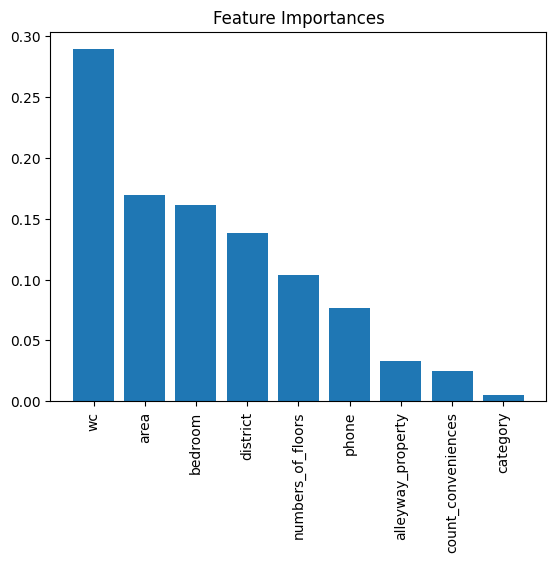

In [ ]:
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)

plt.show()

In [ ]:
y_pred=forest.predict(X_train)
MSE_train=mean_squared_error(y_pred,y_train)

In [ ]:
y_pred=forest.predict(X_test)
MSE_test=mean_squared_error(y_pred,y_test)

Text(0.5, 1.0, 'Comparison of MSE for Training and Test Sets')

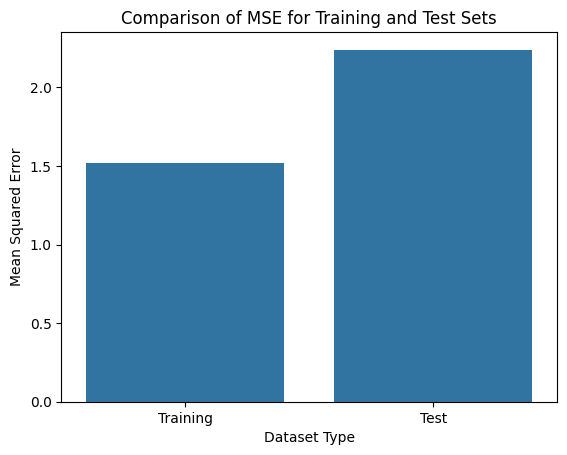

In [ ]:
sns.barplot(x='Type', y='MSE' ,data=pd.DataFrame({'Type':['Training','Test'],'MSE':[MSE_train,MSE_test]}))
plt.xlabel('Dataset Type')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of MSE for Training and Test Sets')

## **4. Pipeline**

In [ ]:
y = y.astype(int)

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
imputer = SimpleImputer(strategy='mean')
trf3 = RandomForest()
pipe = Pipeline([

    ('imputer', imputer),
    ('trf3', trf3),
])

# Ensure y is of integer type
y = y.astype(int)

# Fit the pipeline
pipe.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('trf3', <__main__.RandomForest object at 0x7adeaf655c90>)])

In [ ]:
y_pred=pipe.predict(X_test)

In [ ]:
mean_squared_error(y_pred,y_test)

2.039550509238999

In [ ]:
param_grid = {
    'trf3__n_estimators': [100],
    'trf3__max_depth': [10],
    'trf3__min_samples_split': [2, 5, 8],
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error',n_jobs=10)

In [ ]:
grid.fit(X,y)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('trf3',
                                        <__main__.RandomForest object at 0x7adeaf655c90>)]),
             n_jobs=10,
             param_grid={'trf3__max_depth': [10],
                         'trf3__min_samples_split': [2, 5, 8],
                         'trf3__n_estimators': [100]},
             scoring='neg_mean_squared_error')

do ƒë√≥ c√°c tham s·ªë t·ªëi ∆∞u : max_depth': 10,min_samples_split': 5,n_estimators': 100

In [ ]:
grid.best_params_

{'trf3__max_depth': 10,
 'trf3__min_samples_split': 5,
 'trf3__n_estimators': 100}

## **5.K·∫øt qu·∫£ cu·ªëi c√πng**

In [ ]:
model = RandomForest(n_estimators=100,min_samples_split=10,max_depth=5,max_features=0.8)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("MSE for Training Data:", mse_train)
print("MSE for Test Data:", mse_test)

MSE for Training Data: 1.5229862312737217
MSE for Test Data: 1.6927013329803837


# C√°c technique c·∫ßn thi·∫øt cho decision tree

## Advantaged

- Decision tree  kh√¥ng c·∫ßn normalize hay scaler v√¨ kh√¥ng c√≥ tham s·ªë . Decision tree ch·ªâ c·∫ßn c·∫Øt ·ªü m·ªôt s·ªë l∆∞·ª£ng nh·∫•t ƒë·ªãnh. V√≠ d·ª•: ƒê·ªëi v·ªõi m·ªôt t√≠nh nƒÉng ƒëi t·ª´ 0 ƒë·∫øn 100, vi·ªác c·∫Øt gi·∫£m ·ªü m·ª©c 50 c√≥ th·ªÉ c·∫£i thi·ªán hi·ªáu su·∫•t. Vi·ªác gi·∫£m t·ª∑ l·ªá n√†y xu·ªëng t·ª´ 0 ƒë·∫øn 1, vi·ªác c·∫Øt gi·∫£m 0,5 kh√¥ng l√†m thay ƒë·ªïi ƒëi·ªÅu g√¨.
- V√¨ vi·ªác ph√¢n chia n√™n nh·∫°y c·∫£m v·ªõi c√°c ƒëi·ªÉm outlier
- C√≥ xu h∆∞·ªõng d·ªÖ b·ªã overfitting
-  missing values kh√¥ng ·∫£nh h∆∞·ªüng
- D·ªÖ tr·ª±c quan v√† gi·∫£i th√≠ch
- T·ª± ƒë·ªông l·ª±a ch·ªçn feature.C√°c t√≠nh nƒÉng ƒë√≥ng g√≥p nhi·ªÅu h∆°n v√†o kh·∫£ nƒÉng ƒë∆∞a ra d·ª± ƒëo√°n ch√≠nh x√°c c·ªßa m√¥ h√¨nh ƒë∆∞·ª£c ƒë·∫∑t ·ªü v·ªã tr√≠ cao h∆°n trong c√¢y. Ng∆∞·ª£c l·∫°i, nh·ªØng ƒë·∫∑c ƒëi·ªÉm √≠t li√™n quan h∆°n s·∫Ω ƒë∆∞·ª£c ƒë·∫©y xu·ªëng c√°c nh√°nh th·∫•p h∆°n ho·∫∑c b·ªã l∆∞·ª£c b·ªè ho√†n to√†n. Qu√° tr√¨nh l·ª±a ch·ªçn t√≠nh nƒÉng n√†y c√≥ th·ªÉ gi√∫p c·∫£i thi·ªán hi·ªáu su·∫•t c·ªßa m√¥ h√¨nh v√† gi·∫£m overfitting.
- Decision tree quy·∫øt ƒë·ªãnh d·ª±a tr√™n ph·∫ßn l·ªõn c√°c ƒëi·ªÉm tr√™n kh√¥ng gian feature. N√™n n·∫øu s·ªë l∆∞·ª£ng outlier √≠t, c√≥ th·ªÉ kh√¥ng ·∫£nh h∆∞·ªüng qu√° nhi·ªÅu ƒë·∫øn model
- Gi·∫£i quy·∫øt ƒë∆∞·ª£c c√°c b√†i to√†n non-linear
- Decision tree c≈©ng c√≥ th·ªÉ cung c·∫•p th·ª© h·∫°ng v·ªÅ t·∫ßm quan tr·ªçng c·ªßa t√≠nh nƒÉng. B·∫±ng c√°ch ph√¢n t√≠ch nh·ªØng t√≠nh nƒÉng n√†o ƒë∆∞·ª£c s·ª≠ d·ª•ng ·ªü ƒë·∫ßu c√¢y v√† trong nhi·ªÅu ph·∫ßn t√°ch, b·∫°n c√≥ th·ªÉ hi·ªÉu r√µ h∆°n v·ªÅ nh·ªØng t√≠nh nƒÉng n√†o c√≥ t√°c ƒë·ªông ƒë√°ng k·ªÉ ƒë·∫øn d·ª± ƒëo√°n. Th√¥ng tin quan tr·ªçng n√†y c√≥ th·ªÉ h∆∞·ªõng d·∫´n k·ªπ thu·∫≠t t√≠nh nƒÉng v√† gi√∫p hi·ªÉu ƒë∆∞·ª£c c√°c y·∫øu t·ªë th√∫c ƒë·∫©y c√°c quy·∫øt ƒë·ªãnh c·ªßa m√¥ h√¨nh.

## Disvantaged

- M·ªôt trong nh·ªØng nh∆∞·ª£c ƒëi·ªÉm ch√≠nh c·ªßa decision tree l√† kh·∫£ nƒÉng kh·ªõp qu√° m·ª©c v·ªõi d·ªØ li·ªáu hu·∫•n luy·ªán. Qu√° kh·ªõp x·∫£y ra khi c√¢y qu√° s√¢u v√† ph·ª©c t·∫°p, thu ƒë∆∞·ª£c nhi·ªÖu trong d·ªØ li·ªáu thay v√¨ c√°c m·∫´u c∆° b·∫£n. ƒêi·ªÅu n√†y d·∫´n ƒë·∫øn kh·∫£ nƒÉng kh√°i qu√°t h√≥a k√©m ƒë·ªëi v·ªõi d·ªØ li·ªáu m·ªõi, ch∆∞a ƒë∆∞·ª£c nh√¨n th·∫•y. ƒê·ªÉ gi·∫£i quy·∫øt v·∫•n ƒë·ªÅ n√†y, c√°c k·ªπ thu·∫≠t nh∆∞ c·∫Øt t·ªâa c√¢y v√† ƒë·∫∑t ƒë·ªô s√¢u t·ªëi ƒëa ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ h·∫°n ch·∫ø ƒë·ªô ph·ª©c t·∫°p c·ªßa c√¢y.
- Ch√∫ng r·∫•t nh·∫°y c·∫£m v·ªõi nh·ªØng thay ƒë·ªïi nh·ªè trong d·ªØ li·ªáu hu·∫•n luy·ªán. M·ªôt thay ƒë·ªïi nh·ªè trong d·ªØ li·ªáu c√≥ th·ªÉ d·∫´n ƒë·∫øn c·∫•u tr√∫c c√¢y kh√°c bi·ªát ƒë√°ng k·ªÉ. S·ª± kh√¥ng ·ªïn ƒë·ªãnh n√†y c√≥ th·ªÉ l√†m cho decision tree k√©m tin c·∫≠y h∆°n trong tr∆∞·ªùng h·ª£p d·ªØ li·ªáu hu·∫•n luy·ªán b·ªã nhi·ªÖu ho·∫∑c ch·ª©a c√°c gi√° tr·ªã ngo·∫°i l·ªá.
- Decision tree s·ª≠ d·ª•ng c√°ch ti·∫øp c·∫≠n tham lam ƒë·ªÉ ph√¢n chia d·ªØ li·ªáu t·∫°i m·ªói n√∫t, ch·ªçn t√≠nh nƒÉng gi√∫p gi·∫£m t·∫°p ch·∫•t ho·∫∑c l·ªói ngay l·∫≠p t·ª©c t·ªët nh·∫•t. Tuy nhi√™n, b·∫£n ch·∫•t tham lam n√†y kh√¥ng ph·∫£i l√∫c n√†o c≈©ng d·∫´n ƒë·∫øn c·∫•u tr√∫c c√¢y t·ªïng th·ªÉ t·ªët nh·∫•t. B·∫°n c√≥ th·ªÉ g·∫∑p kh√≥ khƒÉn trong c√°c gi·∫£i ph√°p d∆∞·ªõi m·ª©c t·ªëi ∆∞u, ƒë·∫∑c bi·ªát l√† khi x·ª≠ l√Ω d·ªØ li·ªáu nhi·ªÅu chi·ªÅu.
-ƒê√¥i khi, decision tree c√≥ th·ªÉ kh√¥ng t·ªïng qu√°t h√≥a t·ªët d·ªØ li·ªáu ch∆∞a ƒë∆∞·ª£c nh√¨n th·∫•y, ngay c·∫£ sau khi gi·∫£i quy·∫øt c√°c v·∫•n ƒë·ªÅ v·ªÅ overfitting. ƒêi·ªÅu n√†y c√≥ th·ªÉ x·∫£y ra khi d·ªØ li·ªáu hu·∫•n luy·ªán kh√¥ng th·ªÉ hi·ªán ƒë·∫ßy ƒë·ªß s·ª± ph√¢n b·ªë c·ªßa bi·∫øn m·ª•c ti√™u trong th·∫ø gi·ªõi th·ª±c.